In [1]:
%matplotlib inline

### Load bolshoi-planck halo catalog in halotools

In [2]:
from halotools.sim_manager import CachedHaloCatalog
halocat = CachedHaloCatalog(simname='bolplanck')

cenmask = halocat.halo_table['halo_upid'] == -1
halos = halocat.halo_table[cenmask]
mass_mask0 = (halos['halo_mpeak'] >= 10**11.25) & (halos['halo_mpeak'] < 10**11.5)
mass_mask1 = (halos['halo_mpeak'] >= 10**11.9) & (halos['halo_mpeak'] < 10**12.1)
mass_mask2 = (halos['halo_mpeak'] >= 10**12.8) & (halos['halo_mpeak'] < 10**13.2)
mass_mask3 = (halos['halo_mpeak'] >= 10**13.5) & (halos['halo_mpeak'] < 10**15.5)

### Fix a few bad values and define ellipticity and prolaticity 

In [3]:
ratio_floor = 0.05
halos['halo_b_to_a'] = np.where(halos['halo_b_to_a'] < ratio_floor, 
                                ratio_floor, halos['halo_b_to_a'])
halos['halo_c_to_a'] = np.where(halos['halo_c_to_a'] < ratio_floor, 
                                ratio_floor, halos['halo_c_to_a'])
halos['halo_c_to_a'] = np.where(halos['halo_c_to_a'] > halos['halo_b_to_a'],
                               halos['halo_b_to_a'], halos['halo_c_to_a'])
halos['halo_c_to_b'] = halos['halo_c_to_a']/halos['halo_b_to_a']

halos['evec_norm'] = 1. + halos['halo_b_to_a']**2 + halos['halo_c_to_a']**2

halos['halo_ellipticity'] = (1. - halos['halo_c_to_a']**2)/(2.*halos['evec_norm'])
halos['halo_prolaticity'] = (1. - 2*halos['halo_b_to_a']**2 + halos['halo_c_to_a']**2)/(
    2.*halos['evec_norm'])


### Generate a Monte Carlo realization of the shape model

In [4]:
from axis_ratio_model import monte_carlo_halo_shapes
b_to_a, c_to_a, e, p = monte_carlo_halo_shapes(np.log10(halos['halo_mpeak']))
halos['model_b_to_a'] = b_to_a
halos['model_c_to_a'] = c_to_a
halos['model_ellipticity'] = e
halos['model_prolaticity'] = p

### Spot-check a few distributions against the halo catalog

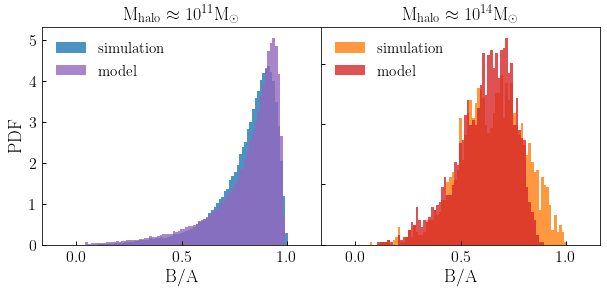

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.subplots_adjust(wspace=0)

rbins = np.linspace(-0.1, 1.1, 100)
__=ax1.hist(halos['halo_b_to_a'][mass_mask0], bins=rbins, density=True, alpha=0.8, 
            color=mblue, label=r'${\rm simulation}$')
__=ax1.hist(halos['model_b_to_a'][mass_mask0], bins=rbins, density=True, alpha=0.8, 
            color=mpurple, label=r'${\rm model}$')

__=ax2.hist(halos['halo_b_to_a'][mass_mask3], bins=rbins, density=True, alpha=0.8, 
            color=morange, label=r'${\rm simulation}$')
__=ax2.hist(halos['model_b_to_a'][mass_mask3], bins=rbins, density=True, alpha=0.8, 
            color=mred, label=r'${\rm model}$')

xlabel = ax1.set_xlabel(r'${\rm B/A}$')
xlabel = ax2.set_xlabel(r'${\rm B/A}$')
ylabel = ax1.set_ylabel(r'${\rm PDF}$')
title = ax1.set_title(r'${\rm M_{halo}\approx10^{11}M_{\odot}}$')
title2 = ax2.set_title(r'${\rm M_{halo}\approx10^{14}M_{\odot}}$')
__=ax2.set_yticklabels([''])
leg = ax1.legend()
leg2 = ax2.legend()
fig.savefig('compare_b_to_a.png', bbox_extra_artists=[xlabel, ylabel], 
            bbox_inches='tight', dpi=200)


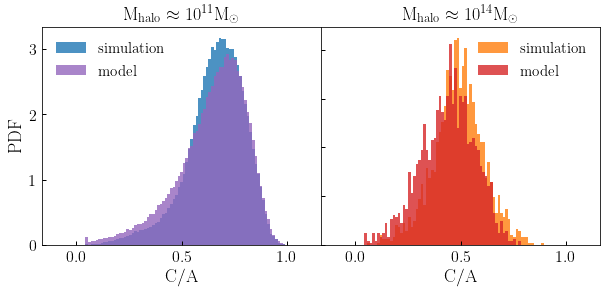

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.subplots_adjust(wspace=0)

rbins = np.linspace(-0.1, 1.1, 100)
__=ax1.hist(halos['halo_c_to_a'][mass_mask0], bins=rbins, density=True, alpha=0.8, 
            color=mblue, label=r'${\rm simulation}$')
__=ax1.hist(halos['model_c_to_a'][mass_mask0], bins=rbins, density=True, alpha=0.8, 
            color=mpurple, label=r'${\rm model}$')

__=ax2.hist(halos['halo_c_to_a'][mass_mask3], bins=rbins, density=True, alpha=0.8, 
            color=morange, label=r'${\rm simulation}$')
__=ax2.hist(halos['model_c_to_a'][mass_mask3], bins=rbins, density=True, alpha=0.8, 
            color=mred, label=r'${\rm model}$')

xlabel = ax1.set_xlabel(r'${\rm C/A}$')
xlabel = ax2.set_xlabel(r'${\rm C/A}$')
ylabel = ax1.set_ylabel(r'${\rm PDF}$')
title = ax1.set_title(r'${\rm M_{halo}\approx10^{11}M_{\odot}}$')
title2 = ax2.set_title(r'${\rm M_{halo}\approx10^{14}M_{\odot}}$')
__=ax2.set_yticklabels([''])
leg = ax1.legend()
leg2 = ax2.legend()
fig.savefig('compare_c_to_a.png', bbox_extra_artists=[xlabel, ylabel], 
            bbox_inches='tight', dpi=200)


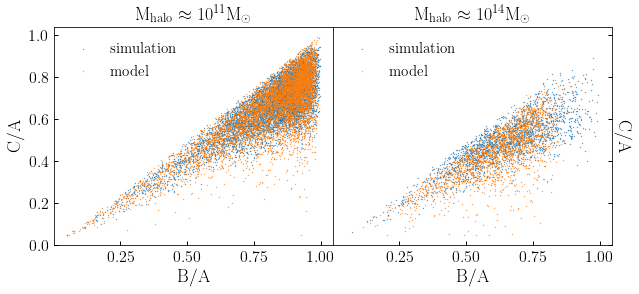

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0)

rbins = np.linspace(-0.1, 1.1, 100)

__=ax1.scatter(halos['halo_b_to_a'][mass_mask0][::20], 
               halos['halo_c_to_a'][mass_mask0][::20], 
               s=0.1, color=mblue, label=r'${\rm simulation}$')
__=ax1.scatter(halos['model_b_to_a'][mass_mask0][::20], 
               halos['model_c_to_a'][mass_mask0][::20], 
               s=0.1, color=morange, label=r'${\rm model}$')

__=ax2.scatter(halos['halo_b_to_a'][mass_mask3], 
               halos['halo_c_to_a'][mass_mask3], 
               s=0.1, color=mblue, label=r'${\rm simulation}$')
__=ax2.scatter(halos['model_b_to_a'][mass_mask3], 
               halos['model_c_to_a'][mass_mask3], 
               s=0.1, color=morange, label=r'${\rm model}$')

xlabel = ax1.set_xlabel(r'${\rm B/A}$')
xlabel = ax2.set_xlabel(r'${\rm B/A}$')
ylabel = ax1.set_ylabel(r'${\rm C/A}$')
__=ax2.yaxis.set_label_position("right")
__=ax2.yaxis.tick_right()  
ylabel2 = ax2.set_ylabel(r'${\rm C/A}$', rotation=-90, labelpad=20)


title = ax1.set_title(r'${\rm M_{halo}\approx10^{11}M_{\odot}}$')
title2 = ax2.set_title(r'${\rm M_{halo}\approx10^{14}M_{\odot}}$')
leg = ax1.legend()
leg2 = ax2.legend()
fig.savefig('compare_c_to_a_vs_b_to_a.png', bbox_extra_artists=[xlabel, ylabel], 
            bbox_inches='tight', dpi=200)


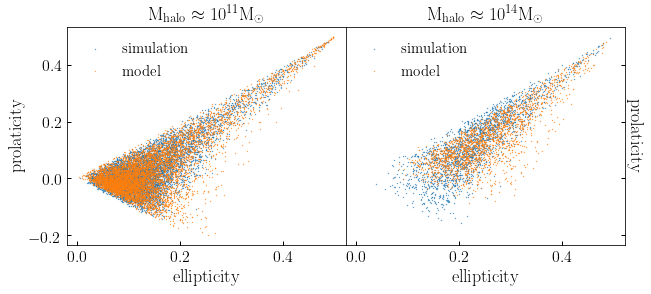

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0)

rbins = np.linspace(-0.1, 1.1, 100)

__=ax1.scatter(halos['halo_ellipticity'][mass_mask0][::20], 
               halos['halo_prolaticity'][mass_mask0][::20], 
               s=0.1, color=mblue, label=r'${\rm simulation}$')
__=ax1.scatter(halos['model_ellipticity'][mass_mask0][::20], 
               halos['model_prolaticity'][mass_mask0][::20], 
               s=0.1, color=morange, label=r'${\rm model}$')

__=ax2.scatter(halos['halo_ellipticity'][mass_mask3], 
               halos['halo_prolaticity'][mass_mask3], 
               s=0.1, color=mblue, label=r'${\rm simulation}$')
__=ax2.scatter(halos['model_ellipticity'][mass_mask3], 
               halos['model_prolaticity'][mass_mask3], 
               s=0.1, color=morange, label=r'${\rm model}$')

xlabel = ax1.set_xlabel(r'${\rm ellipticity}$')
xlabel = ax2.set_xlabel(r'${\rm ellipticity}$')
ylabel = ax1.set_ylabel(r'${\rm prolaticity}$')
__=ax2.yaxis.set_label_position("right")
__=ax2.yaxis.tick_right()  
ylabel2 = ax2.set_ylabel(r'${\rm prolaticity}$', rotation=-90, labelpad=20)


title = ax1.set_title(r'${\rm M_{halo}\approx10^{11}M_{\odot}}$')
title2 = ax2.set_title(r'${\rm M_{halo}\approx10^{14}M_{\odot}}$')
leg = ax1.legend()
leg2 = ax2.legend()
fig.savefig('compare_prolaticity_vs_ellipticity.png', bbox_extra_artists=[xlabel, ylabel], 
            bbox_inches='tight', dpi=200)


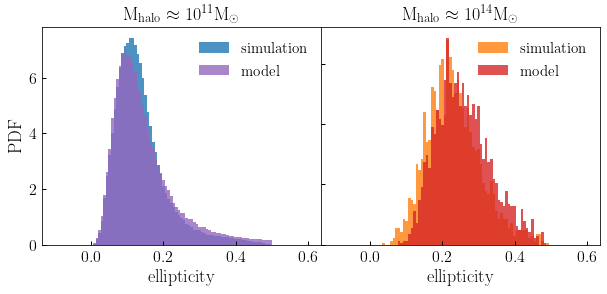

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.subplots_adjust(wspace=0)

ebins = np.linspace(-0.1, 0.6, 100)
__=ax1.hist(halos['halo_ellipticity'][mass_mask0], bins=ebins, density=True, alpha=0.8, 
            color=mblue, label=r'${\rm simulation}$')
__=ax1.hist(halos['model_ellipticity'][mass_mask0], bins=ebins, density=True, alpha=0.8, 
            color=mpurple, label=r'${\rm model}$')

__=ax2.hist(halos['halo_ellipticity'][mass_mask3], bins=ebins, density=True, alpha=0.8, 
            color=morange, label=r'${\rm simulation}$')
__=ax2.hist(halos['model_ellipticity'][mass_mask3], bins=ebins, density=True, alpha=0.8, 
            color=mred, label=r'${\rm model}$')

xlabel = ax1.set_xlabel(r'${\rm ellipticity}$')
xlabel = ax2.set_xlabel(r'${\rm ellipticity}$')
ylabel = ax1.set_ylabel(r'${\rm PDF}$')
title = ax1.set_title(r'${\rm M_{halo}\approx10^{11}M_{\odot}}$')
title2 = ax2.set_title(r'${\rm M_{halo}\approx10^{14}M_{\odot}}$')
__=ax2.set_yticklabels([''])
leg = ax1.legend()
leg2 = ax2.legend()
fig.savefig('compare_ellipticity.png', bbox_extra_artists=[xlabel, ylabel], 
            bbox_inches='tight', dpi=200)


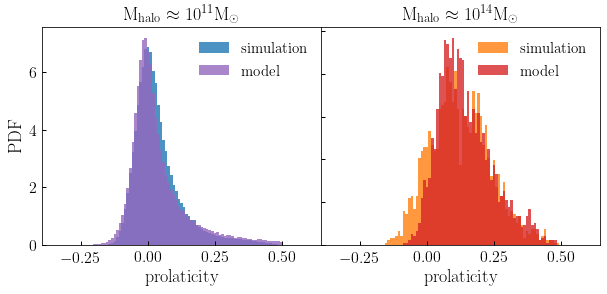

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.subplots_adjust(wspace=0)

pbins = np.linspace(-0.35, 0.6, 100)
__=ax1.hist(halos['halo_prolaticity'][mass_mask0], bins=pbins, density=True, alpha=0.8, 
            color=mblue, label=r'${\rm simulation}$')
__=ax1.hist(halos['model_prolaticity'][mass_mask0], bins=pbins, density=True, alpha=0.8, 
            color=mpurple, label=r'${\rm model}$')

__=ax2.hist(halos['halo_prolaticity'][mass_mask3], bins=pbins, density=True, alpha=0.8, 
            color=morange, label=r'${\rm simulation}$')
__=ax2.hist(halos['model_prolaticity'][mass_mask3], bins=pbins, density=True, alpha=0.8, 
            color=mred, label=r'${\rm model}$')

xlabel = ax1.set_xlabel(r'${\rm prolaticity}$')
xlabel = ax2.set_xlabel(r'${\rm prolaticity}$')
ylabel = ax1.set_ylabel(r'${\rm PDF}$')
title = ax1.set_title(r'${\rm M_{halo}\approx10^{11}M_{\odot}}$')
title2 = ax2.set_title(r'${\rm M_{halo}\approx10^{14}M_{\odot}}$')
__=ax2.set_yticklabels([''])
leg = ax1.legend()
leg2 = ax2.legend()
fig.savefig('compare_prolaticity.png', bbox_extra_artists=[xlabel, ylabel], 
            bbox_inches='tight', dpi=200)
